In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os

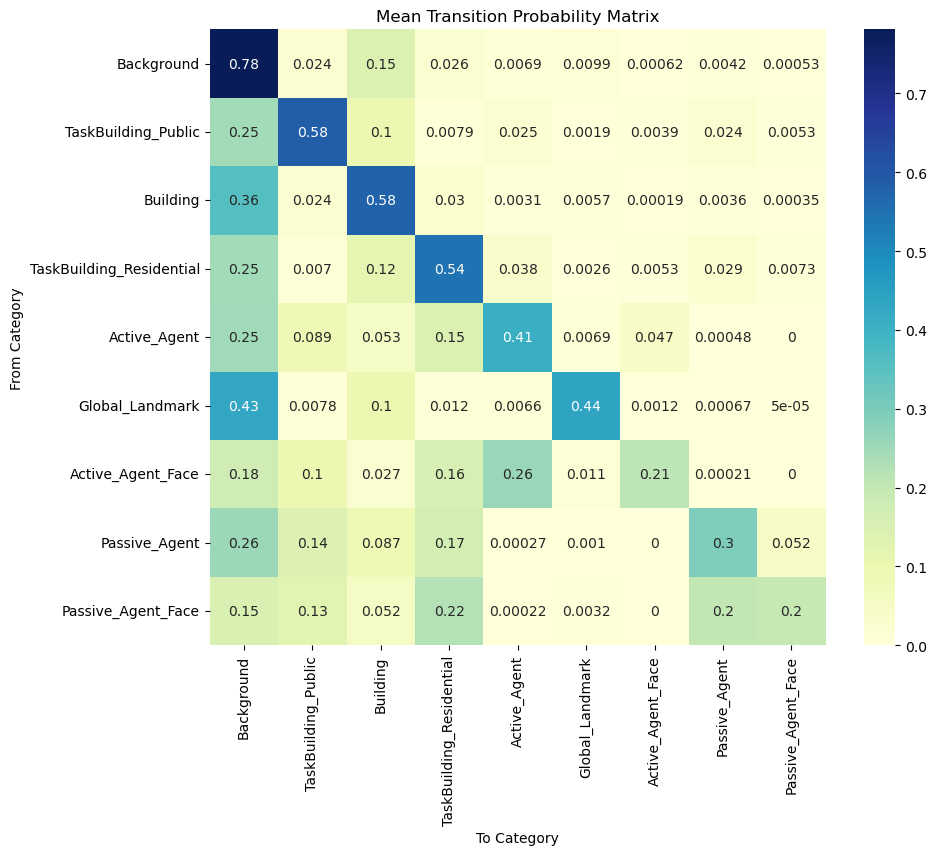

In [2]:
# Path where matrices are saved
save_matrix_path = "/Volumes/TwoTeras/1_Experiment_2/Entropy_Results/Matrices/"

# Load all transition matrix CSV files in the directory
matrix_files = glob.glob(os.path.join(save_matrix_path, "*.csv"))

# Initialize a list to store each normalized matrix as a DataFrame
normalized_matrices = []

# Load each matrix, normalize, and append to the list
for file in matrix_files:
    try:
        # Load matrix and set the first column as the row index
        df = pd.read_csv(file, index_col=0)

        # Check if any row sums to zero (i.e., missing transitions)
        if (df.sum(axis=1) == 0).any():
            print(f"Warning: Matrix in {file} has rows that sum to zero, indicating missing transitions.")
        
        # Normalize each row to ensure rows sum to 1
        df = df.div(df.sum(axis=1), axis=0).fillna(0)
        normalized_matrices.append(df)
    
    except Exception as e:
        print(f"Error processing {file}: {e}")

# Ensure all matrices have the same structure as the first matrix
reference_matrix = normalized_matrices[0]
for i, matrix in enumerate(normalized_matrices):
    normalized_matrices[i] = matrix.reindex_like(reference_matrix).fillna(0)

# Check consistency in matrix shapes
consistent_shape = all(matrix.shape == reference_matrix.shape for matrix in normalized_matrices)
if not consistent_shape:
    raise ValueError("Inconsistent matrix shapes detected after reindexing. Verify the input data.")

# Calculate the mean of all normalized matrices
mean_matrix = sum(normalized_matrices) / len(normalized_matrices)

# Plot the heatmap of the mean matrix
plt.figure(figsize=(10, 8))
sns.heatmap(mean_matrix, annot=True, cmap="YlGnBu", cbar=True, square=True,
            xticklabels=mean_matrix.columns, yticklabels=mean_matrix.index)
plt.title('Mean Transition Probability Matrix')
plt.xlabel('To Category')
plt.ylabel('From Category')
plt.show()


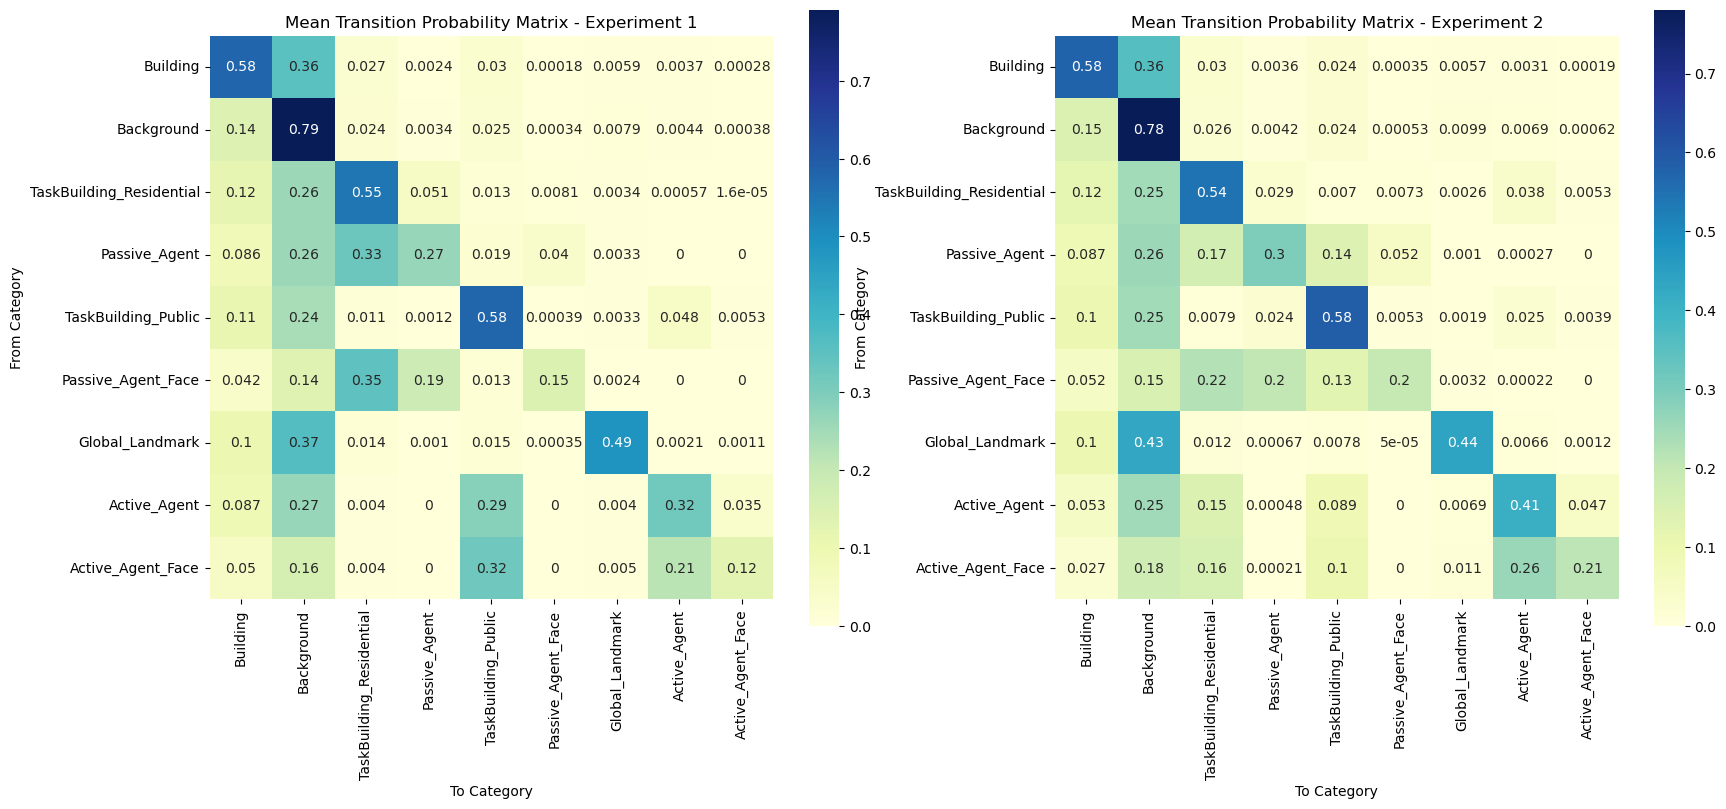

In [3]:
def calculate_mean_matrix(path, reference_index=None):
    # Load all transition matrix CSV files in the directory
    matrix_files = glob.glob(os.path.join(path, "*.csv"))

    # Check if there are any matrices to process
    if not matrix_files:
        print(f"No matrix files found in {path}")
        return None

    # Initialize a list to store each normalized matrix as a DataFrame
    normalized_matrices = []

    # Load each matrix, normalize, and append to the list
    for i, file in enumerate(matrix_files):
        df = pd.read_csv(file, index_col=0)  # Assuming the first column is the row index

        # Set reference index based on the first matrix encountered, if not specified
        if reference_index is None and i == 0:
            reference_index = df.index

        # Reindex to ensure consistent category order
        df = df.reindex(index=reference_index, columns=reference_index).fillna(0)

        # Normalize each row to ensure rows sum to 1
        df = df.div(df.sum(axis=1), axis=0).fillna(0)
        normalized_matrices.append(df)

    # Calculate the mean of all normalized matrices
    mean_matrix = sum(normalized_matrices) / len(normalized_matrices)
    
    return mean_matrix

# Paths for each experiment
path_exp1 = "/Volumes/TwoTeras/0_Experiment_1/Entropy_Results/Matrices/"
path_exp2 = "/Volumes/TwoTeras/1_Experiment_2/Entropy_Results/Matrices/"

# Calculate mean matrices for each experiment, using a fixed category order based on Experiment 1
mean_matrix_exp1 = calculate_mean_matrix(path_exp1)
if mean_matrix_exp1 is not None:
    mean_matrix_exp2 = calculate_mean_matrix(path_exp2, reference_index=mean_matrix_exp1.index)

    # Plot the mean matrices side by side
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))

    sns.heatmap(mean_matrix_exp1, annot=True, cmap="YlGnBu", cbar=True, square=True,
                xticklabels=mean_matrix_exp1.columns, yticklabels=mean_matrix_exp1.index, ax=axes[0])
    axes[0].set_title('Mean Transition Probability Matrix - Experiment 1')
    axes[0].set_xlabel('To Category')
    axes[0].set_ylabel('From Category')

    sns.heatmap(mean_matrix_exp2, annot=True, cmap="YlGnBu", cbar=True, square=True,
                xticklabels=mean_matrix_exp2.columns, yticklabels=mean_matrix_exp2.index, ax=axes[1])
    axes[1].set_title('Mean Transition Probability Matrix - Experiment 2')
    axes[1].set_xlabel('To Category')
    axes[1].set_ylabel('From Category')

    plt.show()
else:
    print("Mean matrix calculation for Experiment 1 failed due to missing files.")

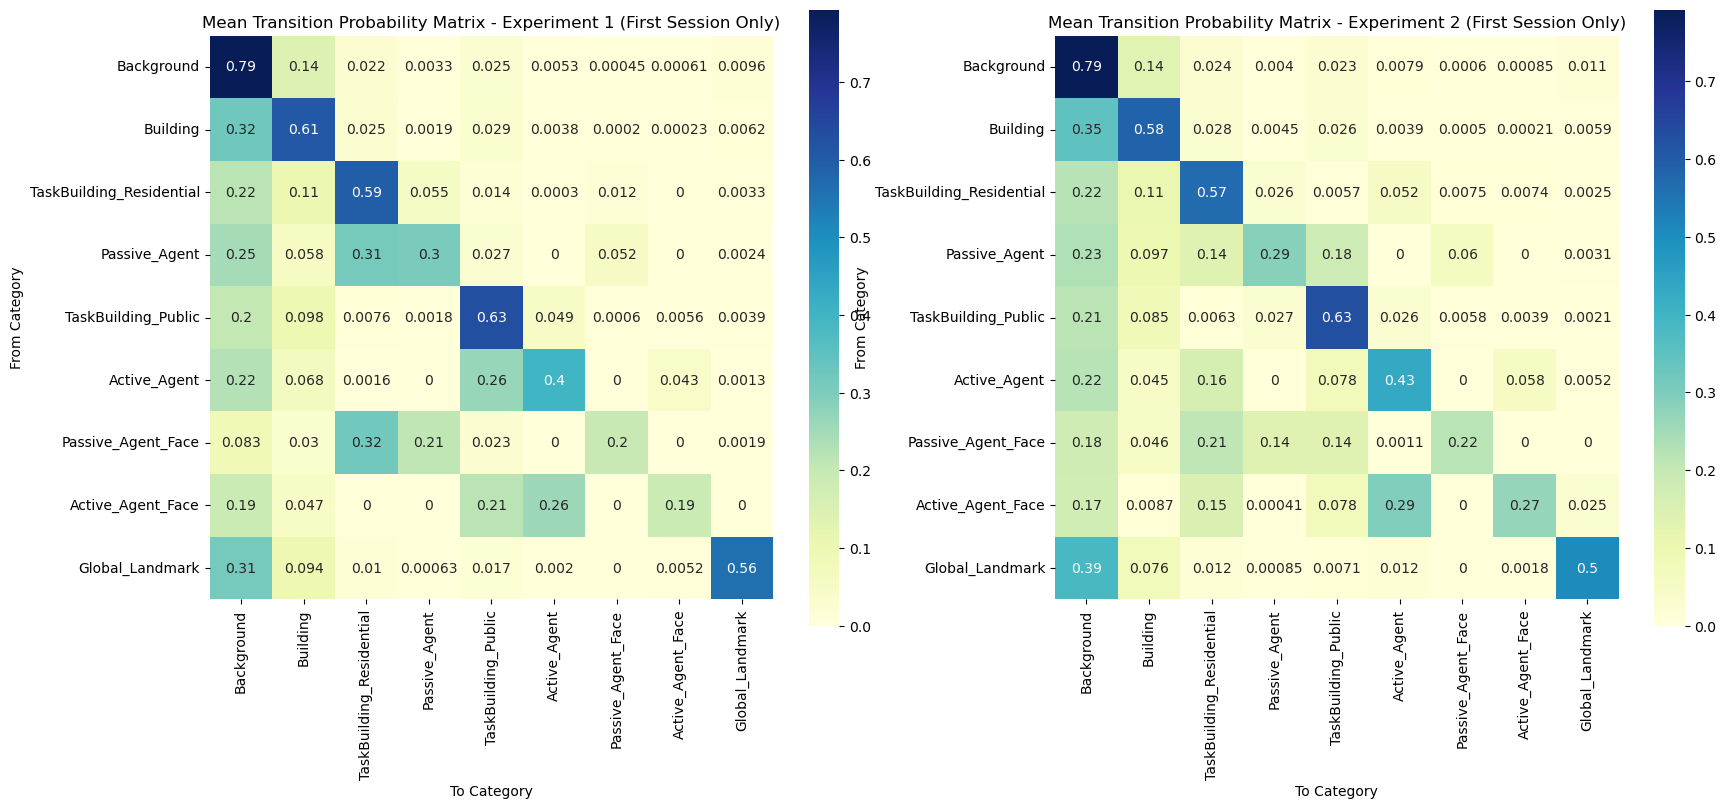

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os

# Main function to calculate the mean matrix
def calculate_mean_matrix(path, reference_index=None):
    # Load all transition matrix CSV files in the directory
    matrix_files = glob.glob(os.path.join(path, "*_1_transition_matrix.csv"))

    # Initialize a list to store each matrix as a DataFrame
    matrices = []

    # Load each matrix and append it to the list
    for i, file in enumerate(matrix_files):
        df = pd.read_csv(file, index_col=0)  # Assuming the first column is the row index

        # Set reference index based on the first matrix encountered, if not specified
        if reference_index is None:
            reference_index = df.index

        # Reindex to ensure consistent category order
        df = df.reindex(index=reference_index, columns=reference_index).fillna(0)

        matrices.append(df)

    # Calculate the mean of all matrices without normalization
    mean_matrix = sum(matrices) / len(matrices)
    
    return mean_matrix

# Paths for each experiment
path_exp1 = "/Volumes/TwoTeras/0_Experiment_1/Entropy_Results/Matrices/"
path_exp2 = "/Volumes/TwoTeras/1_Experiment_2/Entropy_Results/Matrices/"

# Calculate mean matrices for each experiment, using a fixed category order based on Experiment 1
mean_matrix_exp1 = calculate_mean_matrix(path_exp1)
mean_matrix_exp2 = calculate_mean_matrix(path_exp2, reference_index=mean_matrix_exp1.index)

# Plot the mean matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.heatmap(mean_matrix_exp1, annot=True, cmap="YlGnBu", cbar=True, square=True,
            xticklabels=mean_matrix_exp1.columns, yticklabels=mean_matrix_exp1.index, ax=axes[0])
axes[0].set_title('Mean Transition Probability Matrix - Experiment 1 (First Session Only)')
axes[0].set_xlabel('To Category')
axes[0].set_ylabel('From Category')

sns.heatmap(mean_matrix_exp2, annot=True, cmap="YlGnBu", cbar=True, square=True,
            xticklabels=mean_matrix_exp2.columns, yticklabels=mean_matrix_exp2.index, ax=axes[1])
axes[1].set_title('Mean Transition Probability Matrix - Experiment 2 (First Session Only)')
axes[1].set_xlabel('To Category')
axes[1].set_ylabel('From Category')

plt.show()
